In [1]:
from sklearn import datasets

In [2]:
digits = datasets.load_digits()

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
from sklearn.svm import SVC

In [8]:
clf = SVC()

In [9]:
clf.decision_function?

In [10]:
"""
================================
SVM Exercise
================================

A tutorial exercise for using different SVM kernels.

This exercise is used in the :ref:`using_kernels_tut` part of the
:ref:`supervised_learning_tut` section of the :ref:`stat_learn_tut_index`.
"""
print(__doc__)


import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:.9 * n_sample]
y_train = y[:.9 * n_sample]
X_test = X[.9 * n_sample:]
y_test = y[.9 * n_sample:]

# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()



SVM Exercise

A tutorial exercise for using different SVM kernels.

This exercise is used in the :ref:`using_kernels_tut` part of the
:ref:`supervised_learning_tut` section of the :ref:`stat_learn_tut_index`.



Populating the interactive namespace from numpy and matplotlib


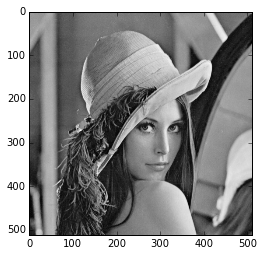

In [15]:
%pylab inline

from scipy import misc
lena = misc.lena()
plt.imshow(lena, cmap='gray')

In [17]:
X = lena.reshape((-1, 1))
X.shape

(262144, 1)

In [19]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=5, n_init=1)
k_means.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [22]:
values = k_means.cluster_centers_.squeeze()

In [24]:
labels = k_means.labels_

array([4, 4, 4, ..., 2, 2, 2], dtype=int32)

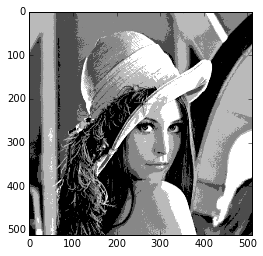

In [26]:
lena_compressed = np.choose(labels, values)
lena_compressed.shape = lena.shape
plt.imshow(lena_compressed, cmap='gray')

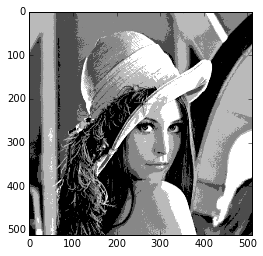

In [28]:
lc2 = [values[c] for c in labels]
lc2 = np.array(lc2)
lc2.shape = lena_compressed.shape
plt.imshow(lc2, cmap='gray')

In [31]:
from sklearn.feature_extraction.image import grid_to_graph

lena_small = lena[::2, ::2] + lena[1::2, ::2] + lena[::2, 1::2] + lena[1::2, 1::2]
X = np.reshape(lena_small, (-1, 1))
connectivity = grid_to_graph(*lena.shape)
connectivity

<262144x262144 sparse matrix of type '<type 'numpy.int64'>'
	with 1308672 stored elements in COOrdinate format>

In [37]:
grid_to_graph(3, 3, return_as=np.ndarray)

array([[1, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 1]])

In [38]:
# Generate sample data
time = np.linspace(0, 10, 2000)
s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
S = np.c_[s1, s2]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise
S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1], [0.5, 2]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

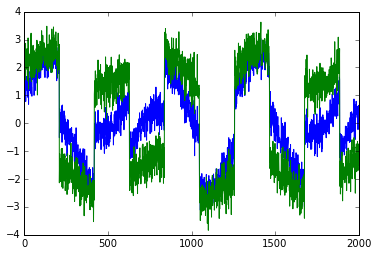

In [49]:
plot(X[:,0])
plot(X[:,1])

In [51]:
from scipy import signal

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]

In [53]:
S.shape

(2000, 3)

In [54]:
S2 = np.r_[s1, s2, s3]
S2.shape

(6000,)

In [57]:
np.vstack((s1, s2, s3)).shape

(3, 2000)

In [58]:
np.hstack((s1, s2, s3)).shape

(6000,)